<a href="https://colab.research.google.com/github/USAMAKHAN444/DeepLearning-part-2-Cnn/blob/main/intel_imageClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [8]:
!kaggle datasets download -d puneet6060/intel-image-classification

100% 345M/346M [00:18<00:00, 20.8MB/s]
100% 346M/346M [00:18<00:00, 19.7MB/s]


In [9]:
import zipfile
zip_ref = zipfile.ZipFile('/content/intel-image-classification.zip')
zip_ref.extractall('/content')
zip_ref.close()

In [10]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [11]:
# generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/seg_train/seg_train',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/seg_test/seg_test',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

Found 14034 files belonging to 6 classes.
Found 3000 files belonging to 6 classes.


In [12]:
# Normalize
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [13]:

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(6,activation='softmax'))

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 254, 254, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Batc  (None, 125, 125, 64)     256       
 hNormalization)                                                 
                                                        

In [15]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [16]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
439/439 [==============================] - 60s 114ms/step - loss: 3.3514 - accuracy: 0.4483 - val_loss: 1.8314 - val_accuracy: 0.4060
Epoch 2/10
439/439 [==============================] - 48s 109ms/step - loss: 1.2684 - accuracy: 0.5197 - val_loss: 1.7670 - val_accuracy: 0.5007
Epoch 3/10
439/439 [==============================] - 48s 110ms/step - loss: 1.0309 - accuracy: 0.5971 - val_loss: 1.4957 - val_accuracy: 0.4927
Epoch 4/10
439/439 [==============================] - 48s 109ms/step - loss: 0.8776 - accuracy: 0.6580 - val_loss: 0.8202 - val_accuracy: 0.6943
Epoch 5/10
439/439 [==============================] - 48s 109ms/step - loss: 0.7916 - accuracy: 0.7027 - val_loss: 0.8056 - val_accuracy: 0.7000
Epoch 6/10
439/439 [==============================] - 48s 110ms/step - loss: 0.7019 - accuracy: 0.7428 - val_loss: 0.6998 - val_accuracy: 0.7503
Epoch 7/10
439/439 [==============================] - 49s 110ms/step - loss: 0.6268 - accuracy: 0.7752 - val_loss: 0.8089 - val_ac

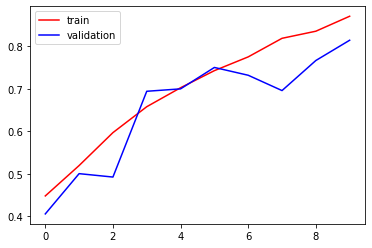

In [17]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

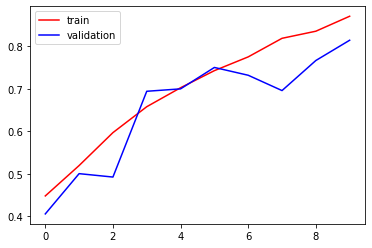

In [18]:
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()